# Theano Variables

In [7]:
# Theano Tensor 
import theano.tensor as T
import pydot
import graphviz
import matplotlib.pyplot as plt

We can create a scalar, vector, and matrix as follows:

In [3]:
c = T.scalar('c')
v = T.vector('v')
A = T.matrix('A')

We also have Tensors, which work with dimensionality 3 and up. This is commonly used when dealing with images that have _not_ been flattened. For instance, if we had a 28x28 image, and we wanted to store the images as squares and we had $N$ images, we would have an $Nx28x28$ (3 dimensional) tensor.

Notice that the variables we have created so far _do not have values_, they are just symbols. This means we can even do algebra on them:

In [4]:
# Dot production
w = A.dot(v)

How do we actually set values to these variables? This is where _theano functions_ come into play. 

In [5]:
import theano

In [6]:
matrix_times_vector = theano.function(inputs=[A,v], outputs=w)

Now we can import numpy so we can create real arrays and call the function:

In [7]:
import numpy as np

In [8]:
A_val = np.array([[1,2], [3,4]])
v_val = np.array([5,6])

w_val = matrix_times_vector(A_val, v_val)
w_val

array([17., 39.])

One of the greatest benefits of theano is that it links all of these variables up into a graph. We can use that structure to calculate gradients for you, using the chain rule! In theano, regular variables are _not_ updateable. In order for a variable to be updateable it must be a _shared_ variable. 

In [135]:
x = theano.shared(20.0, 'x')

In [136]:
y = theano.shared(20.0)

In [137]:
y

<TensorType(float64, scalar)>

We can now create a simple cost function that we can solve ourselves, and that we know has a global minimum. 

In [138]:
cost = x*x + x + 1

In [139]:
theano.printing.pydotprint(cost, var_with_name_simple=True)  

The output file is available at /Users/Nate/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-3.6.5-64/theano.pydotprint.cpu.png


<img src="https://drive.google.com/uc?id=1g-p9MGa2TLbzVvXofLdY7vIMyZNe46Dm">

Now we can tell theano how to update $x$ by giving it an update expression:

In [140]:
x_update = x - 0.3*T.grad(cost, x)

What is nice about theano is that it calculates gradients automatically. The `grad` function takes in two parameters. The first is the function you want to take the gradient of, and the second is the variable you want the gradient with respect to. 

We can now create a theano train function. It will be like the previous function we created, except we are going to add a new argument which is updates. The updates argument takes in a list of tuples, and each tuple has two things in it: 
1. The shared variable to update.
2. The update expression to use. 

In [141]:
train = theano.function(inputs=[], outputs=cost, updates=[(x, x_update)])

We have created a function to train, but we haven't actually called it yet. Notice that $x$ is not an input, it is the thing that we update. In later examples the inputs will be the data and labels. So, the inputs param takes in data and labels, and the updates param takes in your model parameters with their updates.

Now we can write a loop to call the training function. Each iteration of the training function is going to calculate the `outputs`, then perform the `updates`. In this case the `updates` is setting `x` to the value resulting in the evaluation of `x_update`. The value returned from the evaluation of `x_update` is the current `x` value minus the learning rate, `0.3`, times the gradient of the `cost` with respect to `x`. 

In [142]:
x_val_list = []
for i in range(10):
    print('Iteration: ', i)
    print('x value before calling train: ', x.get_value())
    x_val_list.append(x.get_value().tolist())
    cost_val = train()
    print('cost: ',cost_val)
    print('x value after calling train: ', x.get_value())
    print('-----------------')

Iteration:  0
x value before calling train:  20.0
cost:  421.0
x value after calling train:  7.700000000000001
-----------------
Iteration:  1
x value before calling train:  7.700000000000001
cost:  67.99000000000001
x value after calling train:  2.7800000000000002
-----------------
Iteration:  2
x value before calling train:  2.7800000000000002
cost:  11.508400000000002
x value after calling train:  0.8120000000000003
-----------------
Iteration:  3
x value before calling train:  0.8120000000000003
cost:  2.4713440000000007
x value after calling train:  0.024800000000000155
-----------------
Iteration:  4
x value before calling train:  0.024800000000000155
cost:  1.0254150400000002
x value after calling train:  -0.29007999999999995
-----------------
Iteration:  5
x value before calling train:  -0.29007999999999995
cost:  0.7940664064
x value after calling train:  -0.41603199999999996
-----------------
Iteration:  6
x value before calling train:  -0.41603199999999996
cost:  0.757050625

We converge very quickly to the expected cost. We can print the optimal value of $x$ using the `get_value` function:

In [125]:
x.get_value()

array(-0.49785042)

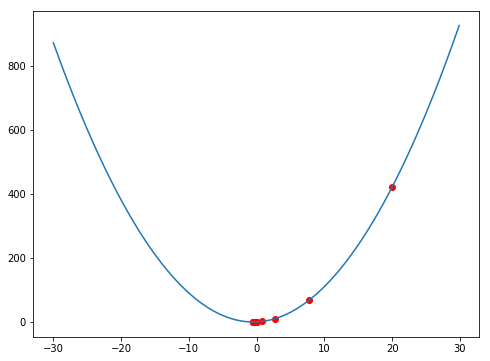

In [126]:
x_axis = np.arange(-30,30,0.1)

def cost_func(x):
    return x*x + x +1 

plt.figure(figsize=(8,6))

for x_val in x_val_list:
    d_tan_marker, = plt.plot(x_val, cost_func(x_val), 'or')
plt.plot(x_axis, cost_function)